In [16]:
import os
import random
import pandas as pd
import gymnasium as gym
from stable_baselines3.common.vec_env import DummyVecEnv
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from Dataloader.SequenceExtractor import SequenceExtractor, collate_fn

In [9]:
env_id = 'CarRacing-v2'
render_mode = "rgb_array"

env = DummyVecEnv([lambda: gym.make(env_id, render_mode=render_mode)])

In [17]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator().manual_seed(0)

In [4]:
# List all subfolders in the folder
models_subfolder = [f.path for f in os.scandir(env_id) if f.is_dir()]

# Choose a random subfolder
random_model_subfolder = random.choice(models_subfolder)

files = [f.path for f in os.scandir(random_model_subfolder) if f.is_file()]

random_file = random.choice(files)
random_file

'CarRacing-v2/model_4/seed_5030118478018109776.parquet'

In [5]:
# Read the Parquet file into a DataFrame
df = pd.read_parquet(random_file)
df['observation'] = df.apply(lambda row : row["observation"].reshape(env.observation_space.shape), axis = 1)
df

,observation,rewards,action
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",511.486481,"[0.61755806, 0.26662815, 0.0]"
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",504.829742,"[0.46577078, 0.72275436, 0.0]"
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",504.929749,"[0.5682878, 0.6275722, 0.3574443]"
3,"[[[100, 202, 100], [100, 205, 100], [100, 213,...",505.029724,"[1.0, 0.0, 0.0]"
4,"[[[100, 202, 100], [100, 202, 100], [100, 222,...",505.129700,"[0.08618155, 0.0, 0.0]"
...,...,...,...
995,"[[[100, 202, 100], [100, 202, 100], [100, 202,...",-0.500000,"[0.7312536, 0.37333202, 0.09682906]"
996,"[[[100, 202, 100], [100, 203, 100], [100, 222,...",-0.400000,"[0.13762873, 0.0, 0.0]"
997,"[[[100, 228, 100], [100, 228, 100], [100, 228,...",-0.300000,"[0.9067978, 0.0, 0.0]"
998,"[[[100, 228, 100], [100, 228, 100], [100, 228,...",-0.200000,"[0.059126824, 1.0, 0.0]"


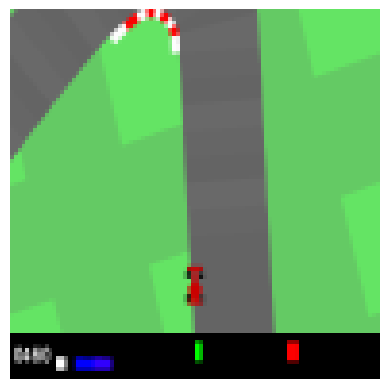

(51.01622, array([0.6923295, 0.       , 0.       ], dtype=float32))

In [6]:
random_row = random.randint(0, len(df))
plt.imshow(df["observation"][random_row])
plt.axis('off')  # Turn off axis labels
plt.show()
df["rewards"][random_row], df["action"][random_row]

In [11]:
sequenceExtractorTrain = SequenceExtractor(env, dataset_len = 128)

In [18]:
batch_size = 128
dataloader_train = DataLoader(sequenceExtractorTrain, batch_size=batch_size, 
                        shuffle=True, num_workers=1, collate_fn = collate_fn,
                        worker_init_fn=seed_worker, generator=g)

torch.Size([128, 32, 1]) torch.Size([128, 32, 3, 96, 96]) torch.Size([128, 32, 3])


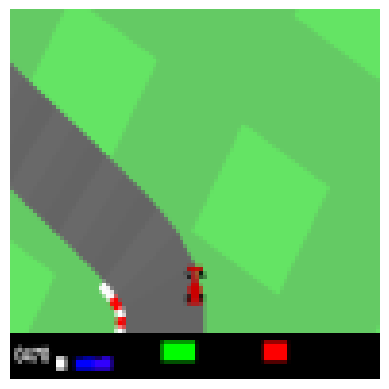

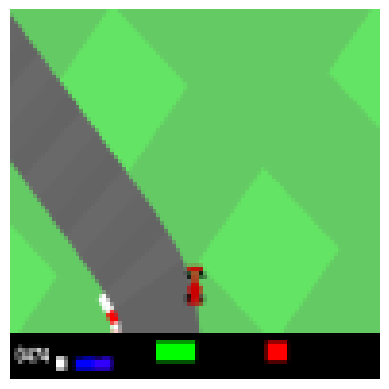

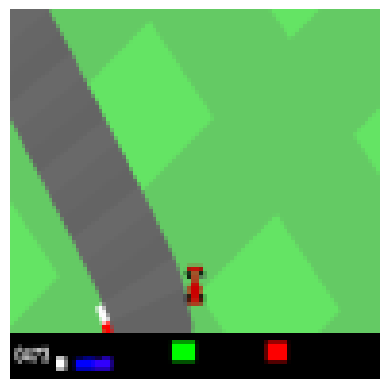

tensor([0.4895]) tensor(0.9922) tensor([-0.7142,  0.8207,  0.0000])


In [25]:
for batch in dataloader_train:
    X, y = batch
    
    rewards = X["rewards"]
    observations = X["observations"]
    actions = X["actions"]
    
    print(rewards.shape, observations.shape, actions.shape )

    plt.imshow(observations[0][0].permute(1, 2, 0))
    plt.axis('off')  # Turn off axis labels
    plt.show()

    plt.imshow(observations[0][3].permute(1, 2, 0))
    plt.axis('off')  # Turn off axis labels
    plt.show()

    plt.imshow(observations[0][6].permute(1, 2, 0))
    plt.axis('off')  # Turn off axis labels
    plt.show()

    print(rewards[0][0],observations.max(), actions[0][0])